## Assignment 1 — Clustering Reddit comments

In this assignment, you will 

1. Download the top-level comments from multiple reddit forums ("subreddits").
2. Construct a single term-document matrix from all of them.
3. Reduce their dimensionality.
4. Cluster the comments to see if you can recover the original subreddits from them.
5. (BONUS) Visualize the clusters in two dimensions.

You will do all the work inside this notebook and submit the your edited notebook back into Canvas.  You may not copy code from elsewhere (with one exception), but you can use functions from any module currently available on mltgpu, where the notebook will be tested.  A major goal of the assignment is, in fact, for you to find them yourself and apply them.  Only edit the notebook in the places where we specify you should do so.

**The assignment is officially due at 23:59 CET on Monday, 2022 February 21. There are 33 points and 9 bonus points on this assignment.**

### Getting started

There is one thing you will have to do from the mltgpu command line to begin (and also in your own installation of Python, if you develop outside of mltgpu), which is to install the PRAW toolkit for scraping Reddit.  This can be accomplished on mltgpu by running the command `pip3 install --user praw` at the terminal/bash prompt.

The PRAW toolkit has [its own documentation](https://praw.readthedocs.io/en/stable/), but there are some very straightforward guides as to how to use it such as [this one](https://medium.com/analytics-vidhya/scraping-reddit-using-python-reddit-api-wrapper-praw-5c275e34a8f4). That latter link contains instructions on how to access subreddits, posts, and comments.  It also contains a link to instructions on how to get Reddit app credentials for your "app" which this notebook is going to be.  

You will have to make your own Reddit account if you don't already have one and then obtain the app credentials.  You will need to create a separate file called `reddit_config.py` outside this notebook to store your client id, user agent, and secret key **which you will not upload or share** as it contains information to access your account.  We will supply our own `reddit_config.py` with this same information.  If you are doing this on mltgpu, run `chmod go-rwx reddit_config.py` to ensure that the information is kept safe. 

For reddit use/scraping, **you may copy code from other web sites** but if you directly copypasted, **you must give attribution (a link) to where you got the code**.  This is the one exception.

You will need to give reasonable, but not excessively verbose, documentation of your code so that we understand what you did.

### Part 1 - logging into Reddit (3 points)

You make no changes to this section.  If you set up the `reddit_config.py` file correctly (deduce how from the code below), it should just work.

In [61]:
import praw
import reddit_config as rc

In [62]:
reddit = praw.reddit.Reddit(client_id=rc.client_id, client_secret=rc.secret_key, user_agent=rc.user_agent)

In [63]:
# should return Subreddit(display_name='fishing') if it works

reddit.subreddit("fishing")

Subreddit(display_name='fishing')

### Part 2 - Get comments (7 points)

Get any 500 top-level comments to submissions (you choose how to select the submissions) from four *each* of the following popular subreddits: LifeProTips, sports, Minneapolis, PersonalFinanceCanada, technews, AskHistorians, philosophy, argentina, bestoflegaladvice, Filmmakers, sewing.  Write in comments which ones you chose. 

You should only get 20 comments from any single submission.  Overlook comments that are fewer than 10 words.

Keep in mind that you will have to keep track of which subreddit you got which comment from in order to validate your work in a Part 5.  This is a data pipeline challenge you must solve.

**Enter and run your code below. You may insert additional code boxes and text boxes for comments.**

In [64]:
from praw.models import MoreComments
import nltk
import pandas as pd
import string

In [65]:
%%time

NUMBER_OF_COMMENTS = 500
MIN_LENGTH_COMMENT = 10
MAX_NUMBER_OF_COMMENTS_PER_SUBMISSION = 20
SUBREDDITS = ['PersonalFinanceCanada', 'argentina', 'Filmmakers', 'technews']


def get_comments_of(subreddit):
    comments_in_subreddit = []
    for submission_id in reddit.subreddit(subreddit).top():
        comment_per_submission = 0
        for comment in reddit.submission(submission_id).comments:
            if not isinstance(comment, MoreComments):
                # since the punctuation will probably be similar in all subreddits, I removed it, to prevent high counts in the term document matrix
                text = [word.lower() for word in nltk.word_tokenize(comment.body) if word not in string.punctuation]

                if len(text) >= MIN_LENGTH_COMMENT:
                    comments_in_subreddit.append(text)
                    comment_per_submission += 1
                    if len(comments_in_subreddit) == NUMBER_OF_COMMENTS:
                        return comments_in_subreddit
                    if comment_per_submission == MAX_NUMBER_OF_COMMENTS_PER_SUBMISSION:
                        break


comments = {}
for subreddit in SUBREDDITS:
    comments[subreddit] = get_comments_of(subreddit)

CPU times: user 9.78 s, sys: 66.6 ms, total: 9.84 s
Wall time: 6min 25s


In [66]:
pd.DataFrame(comments)

PersonalFinanceCanada  \
0    [i, was, in, a, similar, situation, as, you, i...   
1    [we, went, through, this, as, well, the, first...   
2    [a, real, estate, 's, agent, job, could, be, d...   
3    [time, for, a, new, agent, my, agent, was, n't...   
4    [i, hate, to, keep, saying, this, but, maybe, ...   
..                                                 ...   
495  [i, used, to, work, for, one, of, the, large, ...   
496  [does, this, work, for, common-law, partners, ...   
497  [also, is, this, good, for, anything, you, 've...   
498  [who, should, use, beneficiary, then, if, the,...   
499  [this, is, awesome, my, dad, is, setting, up, ...   

                                             argentina  \
0    [chabón, sarpado, miedo, debe, dar, que, te, p...   
1    [quedó, buenísimo, el, vídeo, con, creedence, ...   
2    [que, estén, en, los, trajes, blancos, lo, hac...   
3    [vivo, a, unas, cuadras, de, ahí, iría, a, sac...   
4    [el, tema, es, que, si, no, se, ponen, firmes,...   
..                                                 ...   
495  [en, el, primer, gobierno, en, el, primer, man...   
496  [mirá, que, robar, mí, meme, y, resubirlo, al,...   
497  [se, garchaba, pibitas, de, 14, ..., vos, decí...   
498  [mí, hermano, se, cago, de, risa, y, mí, herma...   
499  [cuando, veo, esa, imagen, me, imagino, esto, ...   

                                            Filmmakers  \
0    [i, came, here, to, say, bullshit, because, th...   
1    [this, was, in, the, movi, promo, that, they, ...   
2    [i, saw, it, in, my, cinematography, class, as...   
3    [i, remember, seeing, this, shit, when, it, ca...   
4    [we, actually, had, to, study, this, scene, in...   
..                                                 ...   
495  [girl, i, need, a, new, mirrorless, camera, br...   
496  [dang, i, would, love, to, see, a, version, fr...   
497  [thought, this, was, super, cute, in, a, pixar...   
498  [i, ca, n't, believe, this, does, n't, have, m...   
499  [am, i, the, only, one, who, watch, it, the, f...   

                                              technews  
0    [big, props, to, him, for, having, the, huge, ...  
1    [chickenshit, is, correct, attempting, or, eve...  
2    [when, you, 're, in, a, position, of, power, b...  
3    [nice, i, got, to, interview, him, a, few, yea...  
4    [we, need, more, humans, like, this, guy, rath...  
..                                                 ...  
495  [citadel, is, the, brains, behind, it, they, a...  
496  [can, i, lose, my, investment, through, them, ...  
497  [i, mean, their, terms, and, conditions, prote...  
498  [unfortunately, the, robinhood, terms, of, ser...  
499  [we, need, to, unite, and, exit, from, this, p...  

[500 rows x 4 columns]

### Part 3 - Construct a term-document matrix in NumPy (9 points)

You may process (lower-case, tokenize, etc.) the comments you collected from Part 2 however you like.  But you will construct a NumPy term-document matrix, that is, an array of arrays where the rows are documents and the columns are words, and the cells are a count of that word in that document.  

**Enter and run your code below. You may insert additional code boxes and text boxes for comments.**

In [67]:
import numpy as np

In [68]:
term_document_matrix = []
vocabulary = []
for subreddit_comments in comments.values():
    for comment in subreddit_comments:
        term_document_matrix.append([0] * len(vocabulary))
        for word in comment:
            if word not in vocabulary:
                vocabulary.append(word)
                for prev_comments in term_document_matrix:
                    prev_comments.append(0)
            term_document_matrix[-1][vocabulary.index(word)] += 1

In [69]:
pd.DataFrame(term_document_matrix, columns=vocabulary)

i  was  in  a  similar  situation  as  you  summer  2020  ...  apes  \
0      1    3   3  3        1          1   2    1       1     1  ...     0   
1      1    5   1  7        0          0   1    3       0     0  ...     0   
2      0    0   0  2        0          0   0    0       0     0  ...     0   
3     10    3   0  5        0          0   0    3       0     0  ...     0   
4      1    0   0  2        0          0   0    1       0     0  ...     0   
...   ..  ...  .. ..      ...        ...  ..  ...     ...   ...  ...   ...   
1995   0    0   0  1        0          0   0    1       0     0  ...     0   
1996   1    0   0  0        0          0   0    0       0     0  ...     0   
1997   1    0   0  1        0          0   0    0       0     0  ...     0   
1998   0    0   0  2        0          0   0    0       0     0  ...     0   
1999   1    1   0  0        0          0   0    0       0     0  ...     0   

      citadel  messenger  arbitrate  bajillion  resolved  \
0           0          0          0          0         0   
1           0          0          0          0         0   
2           0          0          0          0         0   
3           0          0          0          0         0   
4           0          0          0          0         0   
...       ...        ...        ...        ...       ...   
1995        2          1          0          0         0   
1996        0          0          0          0         0   
1997        0          0          1          1         0   
1998        0          0          0          0         1   
1999        0          0          0          0         0   

      //youtu.be/9vd3izdn_oi  unite  msm  manipulation  
0                          0      0    0             0  
1                          0      0    0             0  
2                          0      0    0             0  
3                          0      0    0             0  
4                          0      0    0             0  
...                      ...    ...  ...           ...  
1995                       0      0    0             0  
1996                       0      0    0             0  
1997                       0      0    0             0  
1998                       1      0    0             0  
1999                       0      1    1             1  

[2000 rows x 11231 columns]

In [70]:
np_term_document_matrix = np.matrix(term_document_matrix)
np_term_document_matrix

matrix([[1, 3, 3, ..., 0, 0, 0],
        [1, 5, 1, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [1, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [1, 1, 0, ..., 1, 1, 1]])

### Part 4 - Reduce the dimensionality of the term-document matrix via SVD (3 points)

Perform singular-value decomposition (SVD) on the term-document matrix to reduce the dimensions per document.  Find and use the sklearn `TruncatedSVD` class to reduce the dimensions to 50. 

**Enter and run your code below. You may insert additional code boxes and text boxes for comments.**

In [71]:
from sklearn.decomposition import TruncatedSVD

In [72]:
NUMBER_OF_DIMENSIONS = 50
svd = TruncatedSVD(NUMBER_OF_DIMENSIONS)
reduced_matrix = svd.fit_transform(np_term_document_matrix)
reduced_matrix

/home/dominik/PyCharmProjects/mlt/venv/lib/python3.10/site-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


array([[13.95963569, -1.24202896, -1.90462558, ..., -1.1914211 ,
        -2.18134205, -1.00008677],
       [19.71899404, -0.22144213,  0.96506227, ...,  1.18622295,
         1.59871583, -0.55595743],
       [ 3.72479497,  0.07073638, -0.24505846, ...,  0.48747155,
         0.29609346, -0.47311515],
       ...,
       [ 3.80866364, -0.16780281, -0.35681171, ...,  0.06458412,
        -0.14275953,  0.41216381],
       [ 3.73818689,  0.38021606, -0.26399997, ...,  0.50380893,
        -0.2202556 ,  0.38064378],
       [ 2.67289787, -0.3584197 , -0.59520036, ..., -0.35466633,
         0.13578212,  0.13906057]])

### Part 5 - Clustering (3 points)

Take the SVD-reduced term-document matrix and use sklearn's `AgglomerativeClustering` in order to automatically discover four (4) clusters from the term-document matrix. 

**Enter and run your code below. You may insert additional code boxes and text boxes for comments.**

In [73]:
from sklearn.cluster import AgglomerativeClustering

In [83]:
cluster = AgglomerativeClustering(len(SUBREDDITS)).fit_predict(reduced_matrix)
cluster

array([2, 2, 0, ..., 0, 3, 0])

### Part 5 - Analysis (8 points)

Find and use sklearn's `completeness_score` to test the purity of the clusters.  A score of 1 means that all comments that came from the same subreddit were grouped together.  

If you have a score of less than 1, you have "errors" in the sense that the clustering does not recover the original subreddits form which the comments came.  For each cluster, find a pair of comments in that cluster that come from different subreddits.  Attempt to identify what each of the clusters "means" if anything.  (There may not be a single right answer to this -- "impressionistic" answers are acceptable. 

**Enter and run your code below. You may insert additional code boxes and text boxes for comments and write-up.**

In [75]:
from sklearn.metrics import completeness_score

In [76]:
# comments are still ordered by subreddit (first five hundred comments from first subreddit, second five hundred comments from second subreddit, ...)
predicted_labels = []
for label in range(0, len(SUBREDDITS)):
    predicted_labels.extend([label] * NUMBER_OF_COMMENTS)

compl_score = completeness_score(cluster, predicted_labels)
compl_score

0.07022366965107919

In [89]:
# show how clusters are distributed over subreddits
subreddit_assignments = [[] for _ in range(len(SUBREDDITS))]

for subreddit_index in range(0, len(SUBREDDITS)):
    start = subreddit_index * NUMBER_OF_COMMENTS
    end = start + NUMBER_OF_COMMENTS
    subreddit_cluster = cluster[start:end]
    subreddit_assignments[subreddit_index] = [0] * len(SUBREDDITS)
    for label in subreddit_cluster:
        subreddit_assignments[subreddit_index][label] += 1

subreddit_assignments = np.transpose(subreddit_assignments)
pd.DataFrame(subreddit_assignments, columns=SUBREDDITS)

PersonalFinanceCanada  argentina  Filmmakers  technews
0                    271        493         439       449
1                      3          0           0         0
2                     74          2          20        12
3                    152          5          41        39

In [95]:
# id of all comments in the assigned cluster
comment_assignment = [[] for _ in range(len(SUBREDDITS))]

for comment_number, cluster_number in enumerate(cluster):
    comment_assignment[cluster_number].append(comment_number)

comment_assignment

[[2,
  4,
  5,
  6,
  13,
  14,
  15,
  16,
  19,
  20,
  21,
  22,
  23,
  27,
  30,
  33,
  34,
  36,
  38,
  40,
  41,
  42,
  44,
  45,
  47,
  49,
  50,
  51,
  52,
  53,
  55,
  56,
  57,
  58,
  59,
  60,
  62,
  68,
  71,
  76,
  80,
  82,
  84,
  86,
  87,
  90,
  91,
  94,
  95,
  96,
  100,
  102,
  104,
  105,
  107,
  108,
  117,
  119,
  121,
  123,
  124,
  125,
  127,
  129,
  132,
  137,
  138,
  139,
  144,
  145,
  146,
  147,
  148,
  149,
  151,
  152,
  154,
  155,
  156,
  157,
  158,
  159,
  160,
  164,
  166,
  167,
  168,
  169,
  170,
  171,
  172,
  178,
  179,
  181,
  182,
  183,
  185,
  187,
  189,
  190,
  193,
  200,
  203,
  204,
  205,
  206,
  207,
  208,
  209,
  211,
  213,
  217,
  218,
  219,
  220,
  222,
  224,
  226,
  227,
  231,
  233,
  234,
  236,
  238,
  239,
  241,
  249,
  252,
  253,
  259,
  261,
  262,
  264,
  265,
  267,
  269,
  270,
  271,
  273,
  274,
  275,
  276,
  277,
  278,
  279,
  280,
  281,
  283,
  285,
  290,
  29

In [108]:
# id, length and cluster of each comment
lengths = []
for index, comment in enumerate(term_document_matrix):
    lengths.append((index, sum(comment), cluster[index]))

lengths = sorted(lengths, key=lambda x: x[1], reverse=True)
lengths

[(254, 737, 1),
 (322, 653, 1),
 (10, 616, 1),
 (99, 472, 2),
 (79, 439, 2),
 (282, 439, 2),
 (646, 430, 0),
 (753, 362, 0),
 (309, 323, 2),
 (1137, 319, 2),
 (1851, 318, 2),
 (642, 314, 0),
 (1118, 311, 2),
 (83, 308, 2),
 (286, 308, 2),
 (479, 299, 2),
 (175, 298, 2),
 (289, 279, 2),
 (1727, 270, 2),
 (384, 269, 2),
 (235, 256, 2),
 (1014, 250, 2),
 (293, 247, 2),
 (251, 244, 2),
 (232, 243, 2),
 (258, 243, 2),
 (1870, 240, 2),
 (1, 238, 2),
 (74, 237, 2),
 (298, 237, 2),
 (361, 237, 2),
 (256, 233, 2),
 (39, 228, 2),
 (296, 227, 2),
 (475, 226, 2),
 (245, 223, 2),
 (1640, 221, 2),
 (450, 220, 2),
 (1082, 219, 2),
 (1060, 218, 2),
 (1368, 218, 2),
 (63, 217, 2),
 (1232, 216, 2),
 (1688, 215, 2),
 (250, 213, 2),
 (192, 211, 2),
 (1040, 210, 2),
 (12, 208, 2),
 (1761, 208, 2),
 (284, 206, 2),
 (210, 202, 2),
 (35, 200, 3),
 (64, 199, 2),
 (29, 195, 2),
 (1930, 194, 2),
 (443, 191, 2),
 (66, 190, 2),
 (173, 190, 2),
 (1125, 190, 2),
 (89, 188, 2),
 (110, 188, 2),
 (25, 187, 2),
 (329, 1

In [118]:
# comments of cluster 0
print(comments[SUBREDDITS[0]][71])
print(comments[SUBREDDITS[1]][534 - 500])
print(comments[SUBREDDITS[2]][1023 - 1000])
print(comments[SUBREDDITS[3]][1956 - 1500])

['just', 'post', 'if', 'you', 'have', 'a', 'legit', 'question', 'who', 'cares', 'what', 'others', 'are', 'doing', 'or', 'claiming', 'on', 'the', 'internet']
['si', 'lo', 'logramos', 'podríamos', 'tener', 'un', 'award', 'para', 'cada', 'uno', 'que', 'comentó/dio', 'gold', 'etc']
['i', 'really', 'want', 'them', 'to', 'do', 'a', 'star', 'wars', 'storyboards', 'book', 'for', 'the', 'last', 'jedi', 'now', 'just', 'imagining', 'rian', "'s", 'rendering', 'of', 'the', 'ben', 'swolo', 'shot…']
['well', 'she', 'is', 'clearly', 'better', 'than', 'her', 'selfish', 'prick', 'ex-husband']


In [120]:
# comments of cluster 1
print(comments[SUBREDDITS[0]][10])
print(comments[SUBREDDITS[0]][254])
print(comments[SUBREDDITS[0]][322])

['i', 'relate', 'to', 'this', 'so', 'much', 'there', 'are', 'good', 'realtors', 'and', 'bad', 'ones', 'but', 'the', 'system', 'itself', 'is', 'totally', 'idiotic', 'and', 'the', 'government', 'should', 'step', 'in', 'to', 'regulate', 'and', 'change', 'it', 'i', 'bought', 'and', 'sold', 'one', 'place', 'in', 'canada', 'and', 'have', 'owned', 'two', 'places', 'in', 'sweden', 'where', 'i', 'now', 'live', 'the', 'difference', 'is', 'night', 'and', 'day', 'and', 'the', 'whole', 'industry', 'is', 'so', 'much', 'smoother', 'and', 'more', 'efficient', 'here', 'a', 'few', 'key', 'points', 'at', 'least', 'as', 'it', 'relates', 'to', 'buying/selling', 'an', 'apartment', 'generally', 'co-op', 'not', 'strata', 'in', 'sweden', 'as', 'it', 'compares', 'to', 'canada', 'realtors', 'only', 'work', 'to', 'sell', 'places', 'and', 'there', "'s", 'none', 'of', 'this', 'buying', 'realtor', 'splitting', 'doubling', 'the', 'commission', 'noise', 'agents', 'take', 'a', 'flat', 'rate', 'of', 'about', '9k', 'plus

In [117]:
# comments of cluster 2
print(comments[SUBREDDITS[0]][72])
print(comments[SUBREDDITS[1]][909 - 500])
print(comments[SUBREDDITS[2]][1014 - 1000])
print(comments[SUBREDDITS[3]][1925 - 1500])

['well', 'i', "'m", 'a', 'late', '30s', 'dad', 'who', 'makes', 'a', 'little', 'more', 'than', 'that', 'but', 'is', 'still', 'stuck', 'renting', 'made', 'negligible', 'money', 'until', 'my', '30s', 'you', 'do', "n't", 'really', 'say', 'what', 'you', 'spend', 'money', 'on', 'so', 'it', "'s", 'hard', 'to', 'say', 'obvious', 'basically', 'everything', 'you', 'spend', 'money', 'on', 'for', 'babies', 'is', 'a', 'scam', 'you', 'need', 'a', 'car', 'seat', 'diapers', "'n", 'wipes', 'nothing', 'else', 'really', 'baby', 'food', 'is', 'a', 'scam', 'if', 'you', 'own', 'a', 'blender', 'which', 'can', 'be', 'had', 'for', '20', 'at', 'the', 'sally', 'ann', 'people', 'also', 'love', 'gifting', 'shit', 'to', 'babies', 'let', 'them', 'know', 'clothing', 'sizes', 'if', 'you', "'re", 'really', 'only', 'after', 'a', 'hundred', 'bucks', 'a', 'month', 'food', 're-arranging', 'might', 'do', 'it', 'switching', 'from', 'beef', 'to', 'beans', 'as', 'the', 'protein', 'one', 'dinner', 'a', 'week', 'for', 'instance'

In [119]:
# comments of cluster 3
print(comments[SUBREDDITS[0]][101])
print(comments[SUBREDDITS[1]][918 - 500])
print(comments[SUBREDDITS[2]][1194 - 1000])
print(comments[SUBREDDITS[3]][1661 - 1500])

['asking', 'for', 'tips', 'while', 'picking', 'up', 'takeout', 'has', 'become', 'waaayy', 'too', 'normalized', 'also', 'not', 'sure', 'if', 'this', 'is', 'just', 'within', 'people', 'i', 'know', 'but', 'when', 'i', 'was', 'younger', 'i', 'always', 'heard', 'tipping', '15', 'meant', 'good', 'service', 'but', 'now', 'i', '’', 'm', 'seeing', 'people', 'say', '20', 'should', 'be', 'minimum', 'seems', 'ridiculously', 'high']
['oh', 'hey', 'i', '’', 've', 'seen', 'you', 'in', 'other', 'countries', '’', 'subreddits', 'i', 'was', 'waiting', 'to', 'see', 'what', 'you', 'argentinian', 'dish', 'you', 'were', 'going', 'to', 'go', 'for', 'great', 'job', 'on', 'this', 'one', 'you', 'got', 'a', 'pretty', 'authentic', 'chimichurri', 'going', 'on', 'and', 'the', 'steak', 'looks', 'perfectly', 'cooked', 'cheers', 'mate']
['one', 'time', 'we', '’', 're', 'on', 'set', 'with', 'just', 'a', 'small', 'wild', 'office', 'we', 'had', 'two', 'actors', 'in', 'the', 'room', 'and', 'a', 'fake', 'hallway', 'so', 'we

The cluster 0 is by far the biggest cluster. It contains comments by all four subreddits, but the subreddit 'PersonalFinanceCanada' has the least comments in this subreddit. It seems like the length of the comments had a high impact on the clustering. Although there are also long comments in cluster 0, most of them are shorter (and alomost none of the shorter comments are in other clusters). While this may not be the only feature for this cluster it is likely to be the most important. Another feature, which was important for this cluster is the language. While three subreddits are in english, the fourth ('argentina') is mainly in spanish. Almost all comments of this subreddit are assigned to cluster 0. The comments, which are assigned to other clusters are written in english.

The cluster 1 consists only of three comments of the subreddit 'PersonalFinanceCanada'. These three comments are the longest comments with over 150 words more than the next longest comments. For this cluster, the size of the comment was probably the most important deciding feature.

CLuster 2 and 3 are hard to distinguish. But also here, one fact is again the length of the comments. Comments in cluster 2 tend to be longer than in cluster 3.

### Bonus - Plotting (9 points)

Use matplotlib or install plotly to plot the space in two or three dimensions.  This will require further dimensionality reduction.  Colour-code the plot by subreddit membership.  Does the dimensionality-reduction preserve any sort of discrete or overlapping membership? 

**Enter and run your code below. You may insert additional code boxes and text boxes for comments and write-up.**

In [77]:
import matplotlib.pyplot as plt
import matplotlib.patches as ptch

In [78]:
colors = ['magenta', 'green', 'cyan', 'black']
markers = ['o', 'v', '8', 'X']

legends = []
for index, subreddit in enumerate(SUBREDDITS):
    legends.append(ptch.Patch(color=colors[index], label=subreddit))

In [79]:
svd_3d = TruncatedSVD(3)
reduced_matrix_3d = svd_3d.fit_transform(reduced_matrix)
reduced_matrix_3d

array([[13.95963569, -1.24200066, -1.90465141],
       [19.71899404, -0.22145226,  0.9650338 ],
       [ 3.72479497,  0.07073876, -0.24502087],
       ...,
       [ 3.80866364, -0.16782088, -0.35686421],
       [ 3.73818689,  0.38021743, -0.26392407],
       [ 2.67289787, -0.3584197 , -0.59518486]])

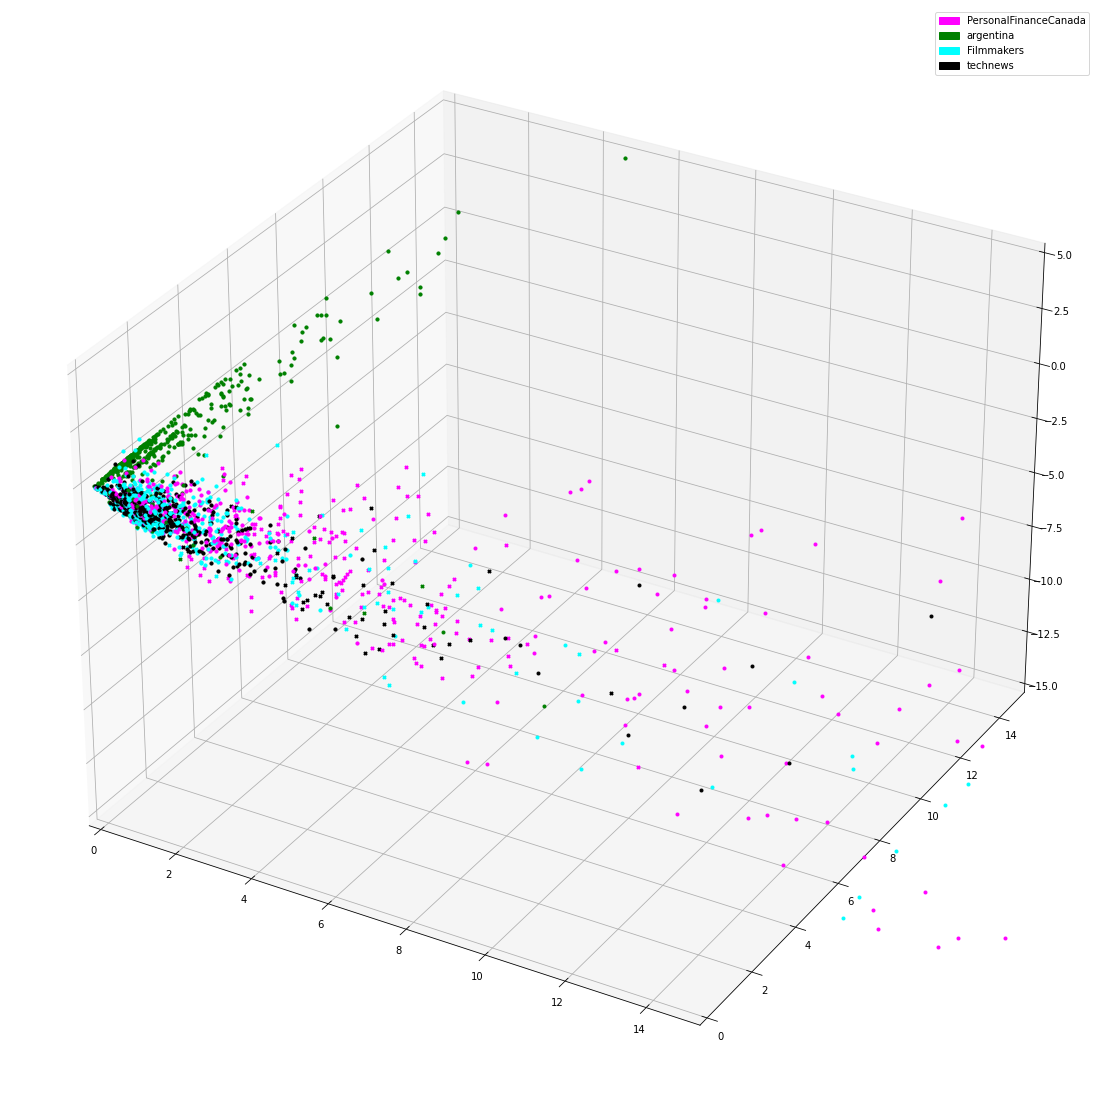

In [80]:
plt.figure(figsize=(30, 20))
ax3d = plt.axes(projection='3d')
ax3d.legend(handles=legends)

# change of the scale to have a better focus on the overlapping clusters
ax3d.set_xlim(0, 15)
ax3d.set_ylim(0, 15)
ax3d.set_zlim(-15, 5)

for index, comment in enumerate(reduced_matrix_3d):
    ax3d.scatter3D(*comment, c=colors[predicted_labels[index]], s=10, marker=markers[cluster[index]])

In [81]:
svd_2d = TruncatedSVD(2)
reduced_matrix_d2 = svd_2d.fit_transform(reduced_matrix)
reduced_matrix_d2

array([[13.95963569, -1.24202728],
       [19.71899404, -0.22144673],
       [ 3.72479497,  0.07074002],
       ...,
       [ 3.80866364, -0.16779178],
       [ 3.73818689,  0.38021319],
       [ 2.67289787, -0.35841575]])

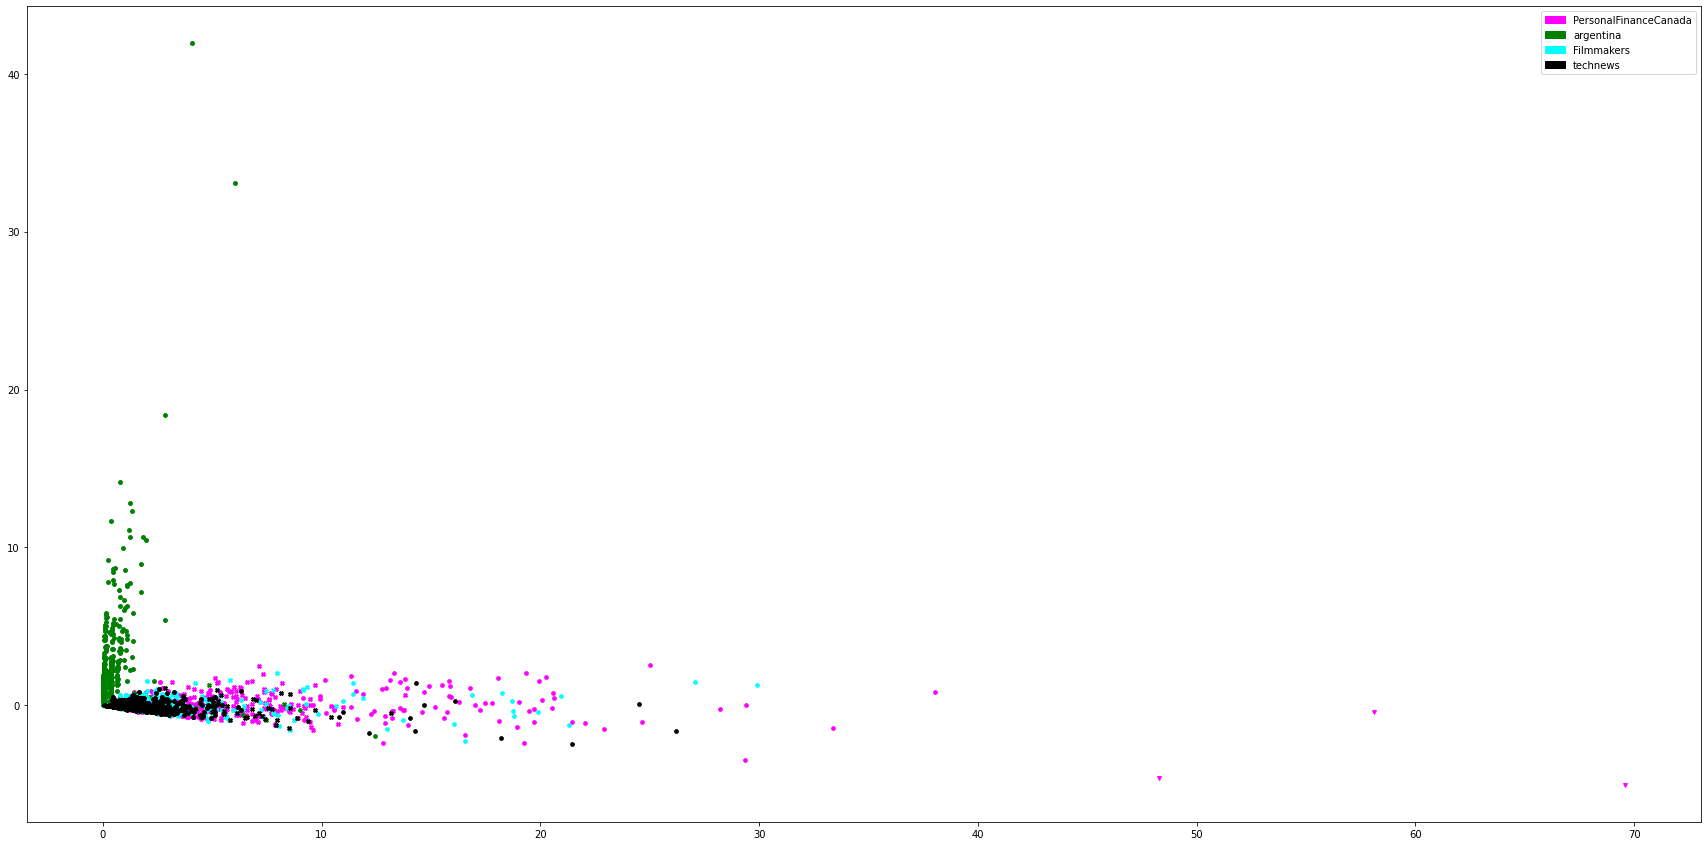

In [113]:
plt.figure(figsize=(30, 15))
ax2d = plt.axes()
ax2d.legend(handles=legends)

# change of the scale to have a better focus on the overlapping clusters
# ax2d.set_xlim(-.5, 25)
# ax2d.set_ylim(-2, 12)

for index, comment in enumerate(reduced_matrix_d2):
    ax2d.scatter(*comment, c=colors[predicted_labels[index]], s=15, marker=markers[cluster[index]])

The first thing that gets clear, when looking at both the 3d and 2d chart that one subreddit is clearly distinguishable from the other three subreddits. These three subreddits in contrast appear to be very similar. The reason for that is probably that the reduction to two/three dimensions can only the most striking differences between the subreddits. In this case, it is the usage of a different language and therefore usage of completely different words in only one subreddit. The other dimension in the 2d seems to be the length of the comment. This does not correspond to the subreddit membership (except for '/r/argentina'), but could already be seen with 50 dimensions. Language and the size of the comments were the most important features and are this still with further dimension reduction.

### Submission

Submit this notebook with all your code and its results (but NOT `reddit_config.py`) in Canvas.  We will run it again on mltgpu when grading (with our own Reddit credentials).